Dubbletter i datan - Innan 1948 - Flest dubbletter inom sporten "art competitoin" år 1952 stiger deltagandet markant. Kategoriserades annorlunda. 

Art kompetitions - konst kopplat till sport. 

Art competitions togs bort efter OS i London 1948.

1920 - Ungen förbjöds att vara med pga sin roll och inblandning i första världskriget.  
  

1984 - Ungern bojkottade OS 1984 i Los Angeles, tillsammans med andra öststatländer, som svar på den USA-ledda bojkotten av OS i Moskva 1980. Bojkotten var en politisk handling som genomfördes på Sovjetunionens begäran. 
Orsak: Bojkotten var en vedergällning för den bojkott som USA och andra länder genomförde mot OS i Moskva 1980.
Beslut: Ungern deltog inte eftersom de, likt andra socialistiska länder, följde Sovjetunionens beslut.  
  
(1980 - USA ledde en bojkott av de Olympiska spelen i Moskva som en protest mot Sovjets invasion av Afghanistan. Ytterligare 60 länder deltog i bojkotten, bland annat Kina.)  
  
1984 - Som en följd av det Kalla kriget bojkottade Sovjet och många andra länder i östblocket de Olympiska spelen i Los Angeles.  

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

# Ladda in data
athletes = pd.read_csv("../athlete_events.csv")
noc = pd.read_csv("../noc_regions.csv")


In [2]:

# Slå ihop dataset för att få regionnamn
data = pd.merge(athletes, noc, on="NOC", how="left")


In [ ]:
data.describe

<bound method NDFrame.describe of             ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Sum

**Sorterar alla unika deltagare** (all, Hungary & Sweden) genom att ta bort dubbletter utifrån ID, Year och Sport. Då får vi ut antal unika deltaganden, även om det skett av samma person, vid olika årtal och sporter. 

In [3]:
all_unique = (
    data.drop_duplicates(subset=["ID", "Year", "Event"])
)

hungary_unique = (
    data[data["NOC"] == "HUN"]
    .drop_duplicates(subset=["ID", "Year", "Event"])
)

sweden_unique = (
    data[data["NOC"] == "SWE"]
    .drop_duplicates(subset=["ID", "Year", "Event"])
)

print(f"{len(all_unique)}")
print(f"{len(hungary_unique)}")
print(f"{len(sweden_unique)}")

269636
6552
8291


Hur många länder totalt?: 

In [4]:
countries = all_unique['NOC'].unique()
print(len(countries))
print("b) Länder (NOC-förkortningar):")
print(countries)

230
b) Länder (NOC-förkortningar):
['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'MAR' 'ESP' 'EGY'
 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE' 'CMR'
 'TUR' 'CHI' 'MEX' 'URS' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VA

Sorterar utifrån Season "Winter": 

In [5]:
winter_all = all_unique[all_unique["Season"] == "Winter"]
winter_hungary = hungary_unique[hungary_unique["Season"] == "Winter"]
winter_sweden = sweden_unique[sweden_unique["Season"] == "Winter"]

print(f"{len(winter_all)}")
print(f"{len(winter_hungary)}")
print(f"{len(winter_sweden)}")

48564
478
2263


In [6]:
summer_all = all_unique[all_unique["Season"] == "Summer"]
summer_hungary = hungary_unique[hungary_unique["Season"] == "Summer"]
summer_sweden = sweden_unique[sweden_unique["Season"] == "Summer"]

print(f"{len(summer_all)}")
print(f"{len(summer_hungary)}")
print(f"{len(summer_sweden)}")

221072
6074
6028


Alla deltagare för alla länder, Ungern och Sverige i tennis: 

In [7]:
tennis_all = all_unique[all_unique["Sport"] == "Tennis"]
tennis_hungary = hungary_unique[hungary_unique["Sport"] == "Tennis"] 
tennis_sweden = sweden_unique[sweden_unique["Sport"] == "Tennis"] 

print(f"{len(tennis_all)}")
print(f"{len(tennis_hungary)}")
print(f"{len(tennis_sweden)}")

2862
60
129


Diagram över könsfördelningen i tennis (alla länder, Ungern och Sverige):

In [37]:



pio.renderers.default = "browser"  # Tillfälligt, får inte upp i nb.

# Lägg till en kolumn som talar om grupp
all_group = tennis_all.assign(Group="Alla länder")
hun_group = tennis_hungary.assign(Group="Ungern")
swe_group = tennis_sweden.assign(Group="Sverige")

# Slå ihop
tennis_combined = pd.concat([all_group, hun_group, swe_group])

# Gör cirkeldiagram
fig = px.pie(
    tennis_combined,
    names="Sex",
    facet_col="Group",        # en subplot per grupp
    category_orders={"Group": ["Alla länder", "Ungern", "Sverige"]},  # ordning
    title="Könsfördelning i tennis – jämförelse"
)

fig.show()


Var och en försig: 

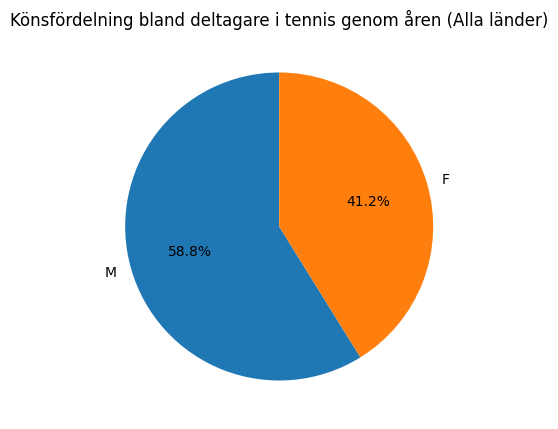

In [14]:
# gender_counts_tennis_all = 

gender_counts_tennis_all = tennis_all['Sex'].value_counts()
plt.figure(figsize=(5,5))
gender_counts_tennis_all.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Könsfördelning bland deltagare i tennis genom åren (Alla länder)")
plt.ylabel("")  # ta bort y-etikett
plt.show()

Diagram över könsfördelningen i tennis (Ungern):

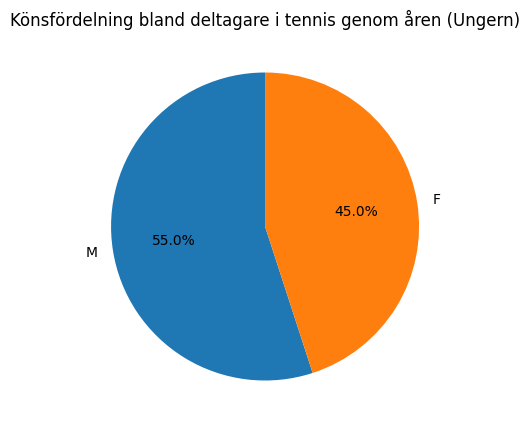

In [15]:
gender_counts_tennis_hungary = tennis_hungary['Sex'].value_counts()
plt.figure(figsize=(5,5))
gender_counts_tennis_hungary.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Könsfördelning bland deltagare i tennis genom åren (Ungern)")
plt.ylabel("")  # ta bort y-etikett
plt.show()

Diagram över könsfördelningen i tennis (Sverige)

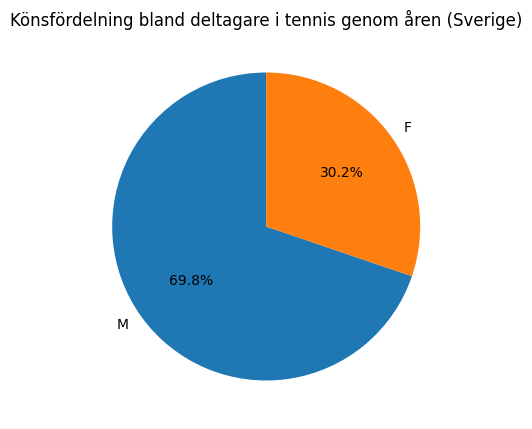

In [16]:
gender_counts_tennis_sweden = tennis_sweden['Sex'].value_counts()
plt.figure(figsize=(5,5))
gender_counts_tennis_sweden.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Könsfördelning bland deltagare i tennis genom åren (Sverige)")
plt.ylabel("")  # ta bort y-etikett
plt.show()

In [18]:
male_all = all_unique[all_unique["Sex"] == "M"]
female_all = all_unique[all_unique["Sex"] == "F"]

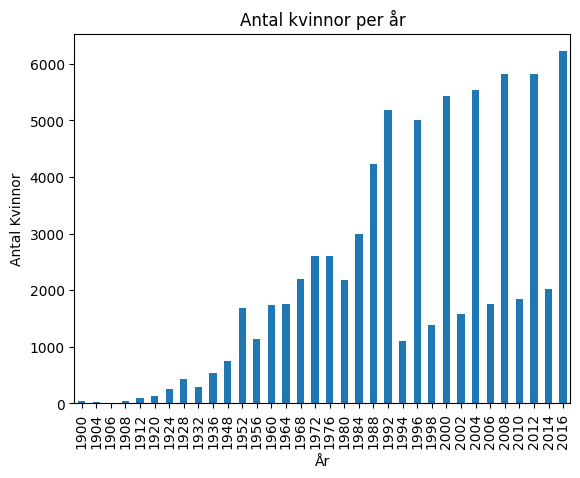

In [19]:
female_attendance_all = female_all.groupby('Year')['ID'].count()

female_attendance_all.plot(kind='bar')
plt.title("Antal kvinnor per år")
plt.xlabel("År")
plt.ylabel("Antal Kvinnor")
plt.show()

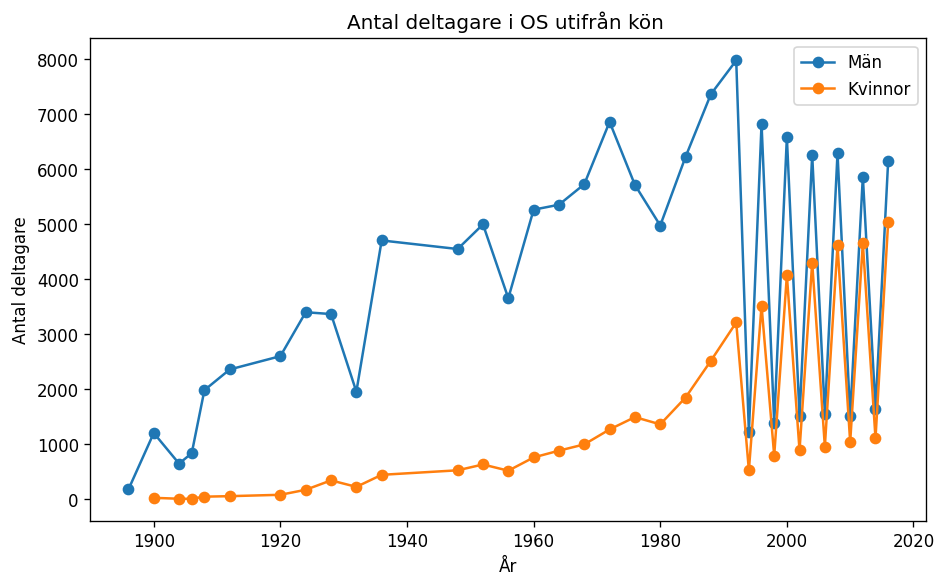

In [ ]:
import matplotlib.pyplot as plt

# Räkna antal unika deltagare per år för sommar/vinter
yearly_male_all = male_all.groupby('Year')['ID'].nunique()
yearly_female_all = female_all.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(yearly_male_all.index, yearly_male_all.values, marker='o', label='Män')
plt.plot(yearly_female_all.index, yearly_female_all.values, marker='o', label='Kvinnor')

plt.title("Antal deltagare i OS utifrån kön ")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # 👈 viktig för att se vilken linje som är vilken
plt.tight_layout()
plt.show()


C:\Users\fanny\AppData\Local\Temp\ipykernel_24504\1006871245.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_24504\1006871245.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



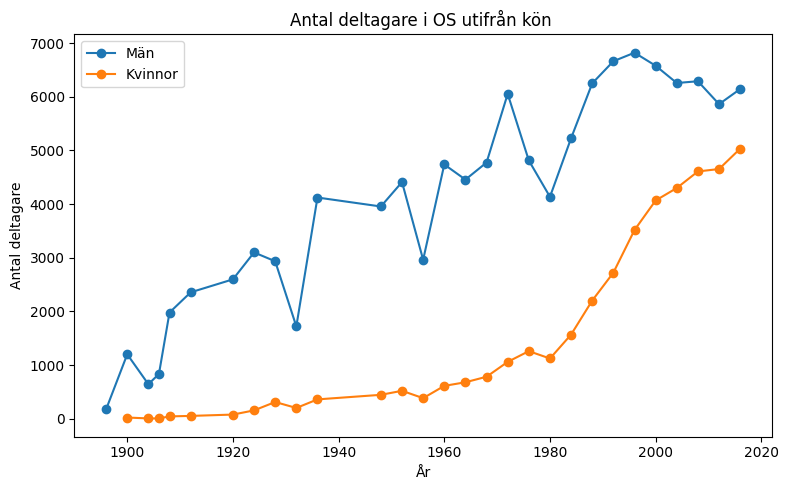

In [39]:
summer_all_male = summer_all[all_unique["Sex"] == "M"]
summer_all_female = summer_all[all_unique["Sex"] == "F"]



summer_male_all = summer_all_male.groupby('Year')['ID'].nunique()
summer_female_all = summer_all_female.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(summer_male_all.index, summer_male_all.values, marker='o', label='Män')
plt.plot(summer_female_all.index, summer_female_all.values, marker='o', label='Kvinnor')

plt.title("Antal deltagare sommmar-OS utifrån kön ")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # för att se vilken linje som är vilken
plt.tight_layout()
plt.show()

C:\Users\fanny\AppData\Local\Temp\ipykernel_24504\1924149420.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_24504\1924149420.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



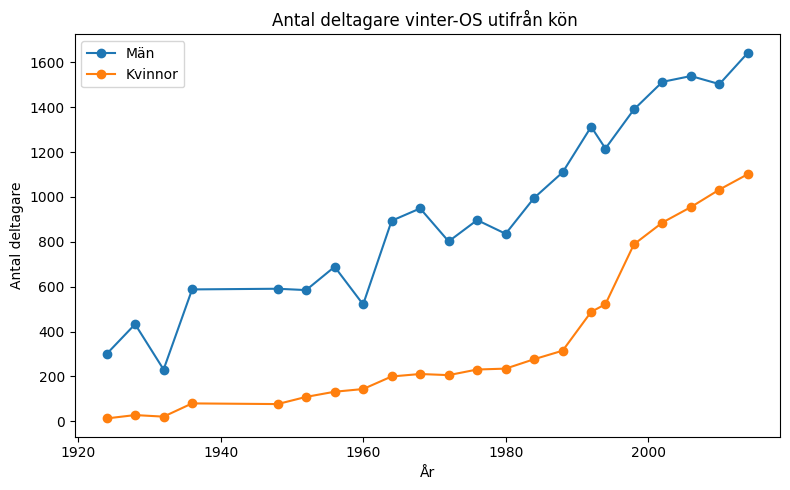

In [41]:
winter_all_male = winter_all[all_unique["Sex"] == "M"]
winter_all_female = winter_all[all_unique["Sex"] == "F"]



winter_male_all = winter_all_male.groupby('Year')['ID'].nunique()
winter_female_all = winter_all_female.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(winter_male_all.index, winter_male_all.values, marker='o', label='Män')
plt.plot(winter_female_all.index, winter_female_all.values, marker='o', label='Kvinnor')

plt.title("Antal deltagare vinter-OS utifrån kön ")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # 👈 viktig för att se vilken linje som är vilken
plt.tight_layout()
plt.show()

C:\Users\fanny\AppData\Local\Temp\ipykernel_24504\2468618826.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_24504\2468618826.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



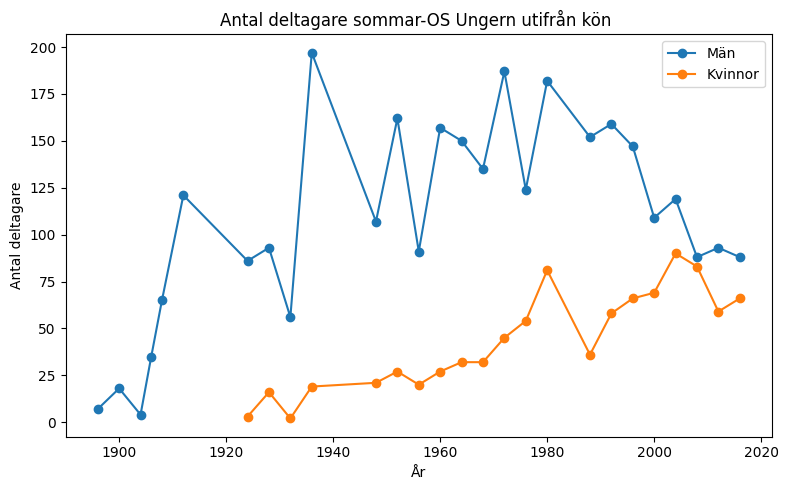

In [45]:
summer_hungary_male = summer_hungary[hungary_unique["Sex"] == "M"]
summer_hungary_female = summer_hungary[hungary_unique["Sex"] == "F"]

summer_male_hungary = summer_hungary_male.groupby('Year')['ID'].nunique()
summer_female_hungary = summer_hungary_female.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(summer_male_hungary.index, summer_male_hungary.values, marker='o', label='Män')
plt.plot(summer_female_hungary.index, summer_female_hungary.values, marker='o', label='Kvinnor')

plt.title("Antal deltagare sommar-OS Ungern utifrån kön ")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # för att se vilken linje som är vilken
plt.tight_layout()
plt.show()

C:\Users\fanny\AppData\Local\Temp\ipykernel_24504\728802023.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\fanny\AppData\Local\Temp\ipykernel_24504\728802023.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



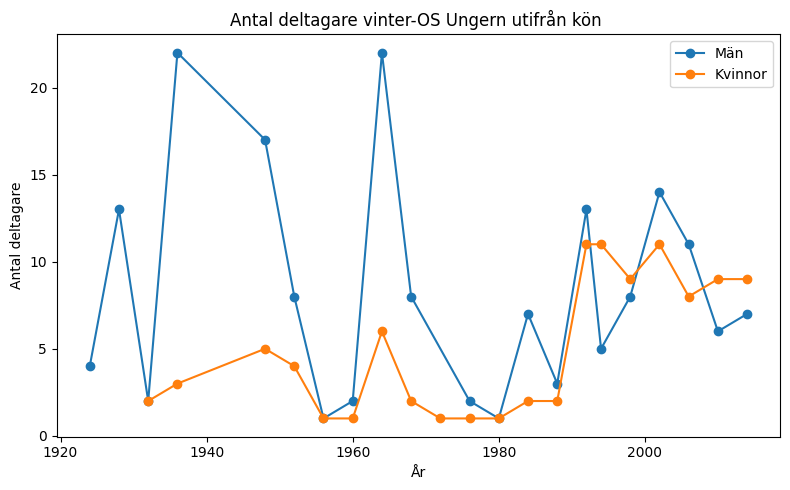

In [44]:
winter_hungary_male = winter_hungary[hungary_unique["Sex"] == "M"]
winter_hungary_female = winter_hungary[hungary_unique["Sex"] == "F"]

winter_male_hungary = winter_hungary_male.groupby('Year')['ID'].nunique()
winter_female_hungary = winter_hungary_female.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(winter_male_hungary.index, winter_male_hungary.values, marker='o', label='Män')
plt.plot(winter_female_hungary.index, winter_female_hungary.values, marker='o', label='Kvinnor')

plt.title("Antal deltagare vinter-OS Ungern utifrån kön ")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # för att se vilken linje som är vilken
plt.tight_layout()
plt.show()

OS - vart det hölls har inverkan på deltagande!

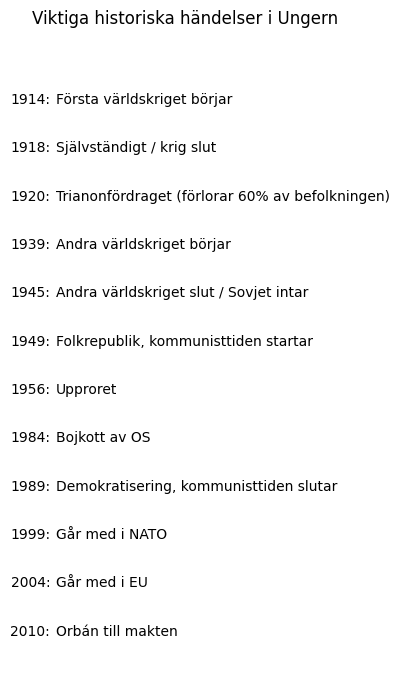

In [100]:

years = [
    1914,
    1918,
    1920,
    1939,
    1945,
    1949,
    1956,
    1984,
    1989,
    1999,
    2004,
    2010,
]

events = [
    "Första världskriget börjar",
    "Självständigt / krig slut",
    "Trianonfördraget (förlorar 60% av befolkningen)",
    "Andra världskriget börjar",
    "Andra världskriget slut / Sovjet intar",
    "Folkrepublik, kommunisttiden startar",
    "Upproret",
    "Bojkott av OS",
    "Demokratisering, kommunisttiden slutar",
    "Går med i NATO",
    "Går med i EU",
    "Orbán till makten",
]

fig, ax = plt.subplots(figsize=(4, 7))

# Stäng av axlarna helt
ax.axis("off")

# Vi lägger raderna under varandra
n = len(years)
for i, (year, event) in enumerate(zip(years, events)):
    y = n - 1 - i  # så att det första hamnar högst upp
    ax.text(0.05, y, str(year) + ":", ha="right", va="center", fontsize=10)
    ax.text(0.07, y, event, ha="left", va="center", fontsize=10)

# Justera "koordinatsystemet" så att all text syns
ax.set_xlim(0, 1)
ax.set_ylim(-1, n)

plt.title("Viktiga historiska händelser i Ungern", pad=20)
plt.tight_layout()
plt.show()


Se hur många medlajer ungerska deltagere tagit genom åren:

In [28]:

# Medalj-data (per idrottare)
hun_medals = hungary_unique.dropna(subset=["Medal"]).copy()

# Medalj-data unika per event/OS (undviker dubbelräkning i lag/grenar)
hun_unique_medals = (
    hun_medals.drop_duplicates(subset=["Games", "Event", "Medal", "NOC"])
    .copy()
)

print(f"Antal medaljer (idrottare-räknat): {len(hun_medals)}")
print(f"Antal unika medaljer (event/OS-räknat): {len(hun_unique_medals)}")


Antal medaljer (idrottare-räknat): 1135
Antal unika medaljer (event/OS-räknat): 510


Exempel:

Om Ungerns herrlag i vattenpolo tar 1 guld, och laget består av 13 spelare,
→ Då finns 13 rader i datasetet (en per idrottare),
→ Alla med Medal = "Gold" och Sport = "Water Polo".
→ Då blir det 13 medaljer i vattenpolo i den här beräkningen.

Det visar hur många individer som fått medalj i varje sport.
Bra för att se:

Hur många idrottare som faktiskt har fått medalj

Hur stort deltagandet i medaljgrenar varit

Men inte bra för att jämföra länder eller sporter rättvist (lagidrotter överrepresenterade).


Samma exempel:

Ungerns herrlag i vattenpolo tar 1 guld
→ även om 13 spelare står med i filen,
→ så räknas det bara som 1 guld.

Det visar hur många faktiska medaljer Ungern har vunnit i varje sport.
Bra för att se:

Landets verkliga OS-medaljresultat (som i medaljtabeller)

Jämförelser mellan länder och sporter

Sporter Ungern tagit flest medaljer i (alla deltagere räknat(alla i ett lag räknas) och per event(lagsporter räknas som en))

In [46]:
hun_sports = hungary_unique['Sport'].unique()
hun_events = hungary_unique['Event'].unique()
print(f"{len(hun_sports)}")
print(f"{len(hun_events)}")

42
443


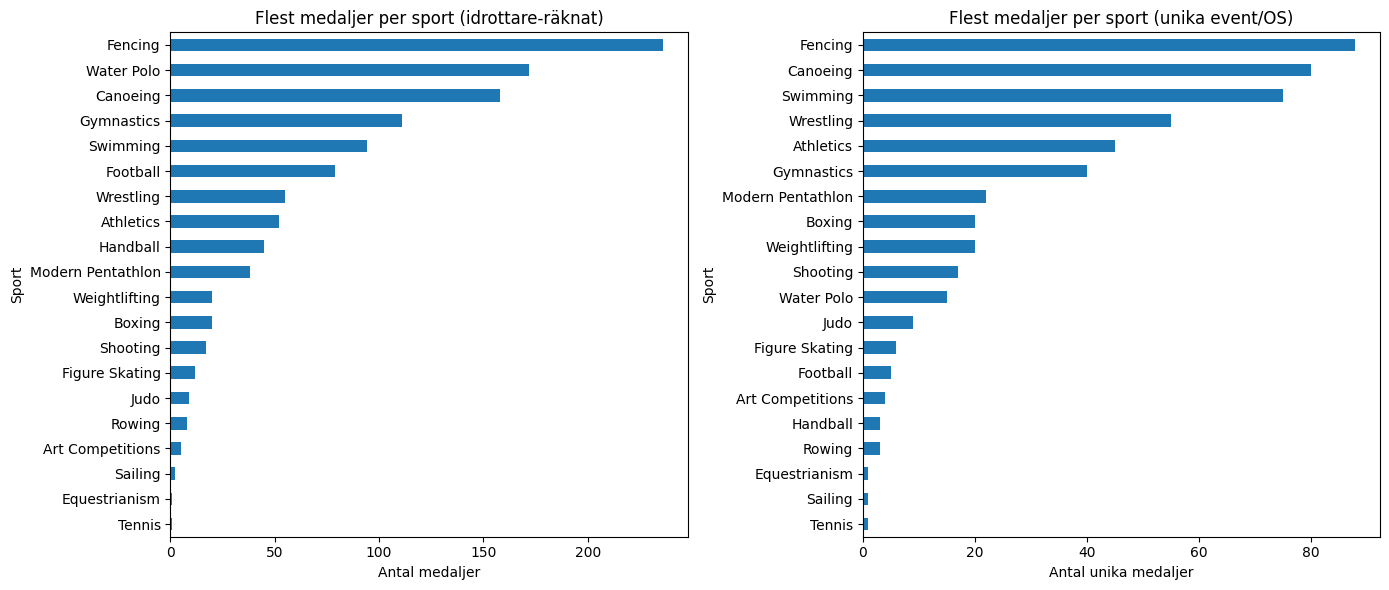

In [30]:
# Alla lagmedlemmar räknas. 
medals_by_sport_athlete = (
    hun_medals.groupby("Sport")["Medal"].count().sort_values(ascending=False)
)

# Unika medaljer (per event/OS) ---
medals_by_sport_unique = (
    hun_unique_medals.groupby("Sport")["Medal"].count().sort_values(ascending=False)
)


# Plottar båda för att se skillnaden
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)
medals_by_sport_athlete.head(42).plot(kind="barh", ax=axes[0])
axes[0].invert_yaxis()
axes[0].set_title("Flest medaljer per sport (idrottare-räknat)")
axes[0].set_xlabel("Antal medaljer")

medals_by_sport_unique.head(42).plot(kind="barh", ax=axes[1])
axes[1].invert_yaxis()
axes[1].set_title("Flest medaljer per sport (unika event/OS)")
axes[1].set_xlabel("Antal unika medaljer")

plt.tight_layout()
plt.show()



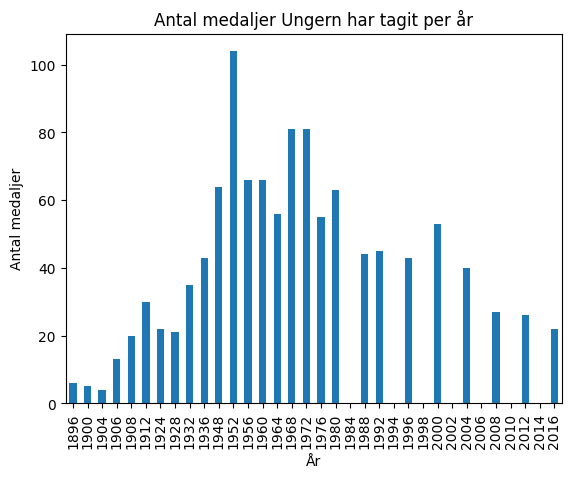

In [31]:
medal_per_year = hungary_unique.groupby('Year')['Medal'].count()

medal_per_year.plot(kind='bar')
plt.title("Antal medaljer Ungern har tagit per år")
plt.xlabel("År")
plt.ylabel("Antal medaljer")
plt.show()

Antal brons, silver och gult Ungern tagit. 

In [ ]:
hun_unique_medals[hun_unique_medals['Medal'] == 0].shape[0]
hun_unique_medals['Medal'].value_counts() 

Medal
Bronze    139
Gold      132
Silver    123
Name: count, dtype: int64

Vilka sporter finns med? (OS Alla) 

In [32]:
sports = all_unique['Sport'].unique()
print(f"c) Antal sporter: {len(sports)}")
print(sports)

c) Antal sporter: 66
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


Statistik för åldern (OS Alla):

In [33]:
age_stats = all_unique['Age'].describe()
print("e) Statistik för ålder:")
print(age_stats[['mean', '50%', 'min', 'max', 'std']])

e) Statistik för ålder:
mean    25.452126
50%     24.000000
min     10.000000
max     97.000000
std      6.159011
Name: Age, dtype: float64


Vilket år hade flest deltagare?:

In [34]:
participants_per_year = all_unique.groupby('Year')['ID'].nunique()
print("f) År med flest deltagare:")
print(participants_per_year.sort_values(ascending=False).head())

f) År med flest deltagare:
Year
1992    11183
2016    11179
2008    10899
2000    10647
2004    10557
Name: ID, dtype: int64


Top 10 länder med flest medaljer:

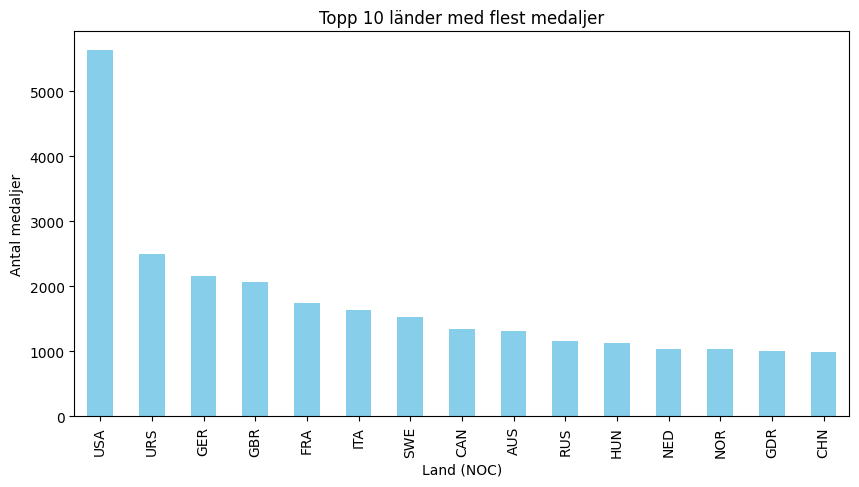

In [35]:
medal_counts = all_unique.dropna(subset=['Medal']).groupby('NOC')['Medal'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,5))
medal_counts.plot(kind='bar', color='skyblue')
plt.title("Topp 10 länder med flest medaljer")
plt.xlabel("Land (NOC)")
plt.ylabel("Antal medaljer")
plt.show()

Antal ungerska deltagare per OS (sommar vs vinter)

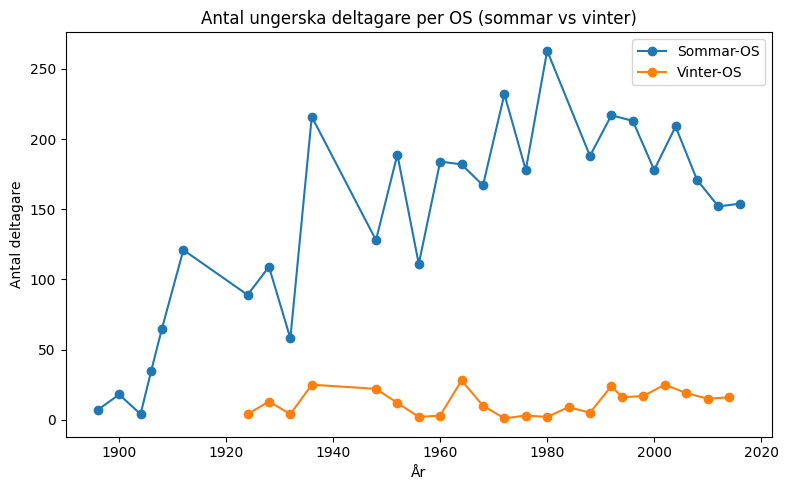

In [36]:
import matplotlib.pyplot as plt

# Räkna antal unika deltagare per år för sommar/vinter
yearly_summer = summer_hungary.groupby('Year')['ID'].nunique()
yearly_winter = winter_hungary.groupby('Year')['ID'].nunique()

plt.figure(figsize=(8, 5))

plt.plot(yearly_summer.index, yearly_summer.values, marker='o', label='Sommar-OS')
plt.plot(yearly_winter.index, yearly_winter.values, marker='o', label='Vinter-OS')

plt.title("Antal ungerska deltagare per OS (sommar vs vinter)")
plt.xlabel("År")
plt.ylabel("Antal deltagare")
plt.legend()       # se vilken linje som är vilken
plt.tight_layout()
plt.show()


Exempel på Hash 
**UPPGIFT 1** - 
Ni får ett land tilldelat till er grupp. Börja med att anonymisera kolumnen med idrottarnas namn med
hashfunktionen SHA-256:

In [ ]:
import pandas as pd
import numpy as np
import hashlib

# 1) Läs in data
athletes = pd.read_csv("../athlete_events.csv")

# 2) Filtrera Ungern och ta en kopia (viktigt för att undvika SettingWithCopy)
hun = athletes.loc[athletes["NOC"] == "HUN"].copy()

# 3) Funktion för SHA-256-hash av namn (med valfri salt för bättre integritet)
def hash_name(name: str, salt: str = "") -> str:
    if pd.isna(name):
        return np.nan
    text = (salt + name.strip().lower()).encode("utf-8")
    return hashlib.sha256(text).hexdigest()

# Salt för hashning gör det svårare att knäcka hashen
SALT = "projekt_ungern_salt" 

# 4) Skapa hash-kolumn och ta bort originalnamn
hun.loc[:, "Name_hash"] = hun["Name"].map(lambda x: hash_name(x, SALT))
hun = hun.drop(columns=["Name"])  # om du vill helt anonymisera

# 5) (Valfritt) Spara som ny fil
hun.to_csv("hungary_anonymized.csv", index=False)

# 6) Snabb koll
print(hun[["NOC", "Name_hash"]].head())
print("Antal unika hashade individer:", hun["Name_hash"].nunique())
